In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.rcParams.update({'font.size': 15})

In [3]:
def read_data(filename='all'):
    path = 'C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/pid_tuning_separate'
    if filename == 'all':
        all_files = glob.glob(path + "/*.csv")
        df_from_each_file = (pd.read_csv(f) for f in all_files)
        data = pd.concat(df_from_each_file, ignore_index=True)
    else:
        data = pd.read_csv(path + '/' + filename + '.csv')
    data = data[data['Mass'] > 3230]
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
    return data
# data90 = read_data('roll_to_90')
# data90lf = read_data('roll_to_90_lf')
# data90lfng = read_data('roll_to_90_lf_new_gains')
data = read_data('all')

In [29]:
def get_min_std_coefficients(data):
    # group by Roll P, Roll I, Roll D and get standard deviations
    df_std = data[['Roll', 'Roll P', 'Roll I', 'Roll D']].groupby(['Roll P', 'Roll I', 'Roll D'], as_index=False).std()
    # return the minimum Roll std coefficients
    return df_std[df_std['Roll'] == df_std['Roll'].min()]

def get_data_from_coefficients(data, coeff):
    return data[
        (data['Roll P'] == coeff['Roll P'].values[0]) &
        (data['Roll I'] == coeff['Roll I'].values[0]) &
        (data['Roll D'] == coeff['Roll D'].values[0])
    ]

def get_optimal_coeff(data, lower_alt, upper_alt):
    # slice
    temp_df = data[(data['Altitude'] > lower_alt) & (data['Altitude'] < upper_alt)]
    # temp_df = data[(data['Roll'] > -100) & (data['Roll'] < -80)]
    if temp_df.shape[0] == 0:
        print("No data")
        return None
    # get coeff corresponding to min std of Roll
    coeff = get_min_std_coefficients(temp_df)
    # get data corresponding to optimal coefficients
    temp_df = get_data_from_coefficients(temp_df, coeff)
    # visualize
    plt.figure(figsize=(15, 10))
    plt.plot(temp_df['Timestamp'], temp_df['Roll'])
    plt.plot(temp_df['Timestamp'], [-90] * temp_df.shape[0])
    plt.xlabel("Timestamp")
    plt.ylabel("Roll")
    # return coeff
    return coeff

## 15K - 20K

,Roll P,Roll I,Roll D,Roll
131,-0.0001,-0.001,-0.1825,5.1951


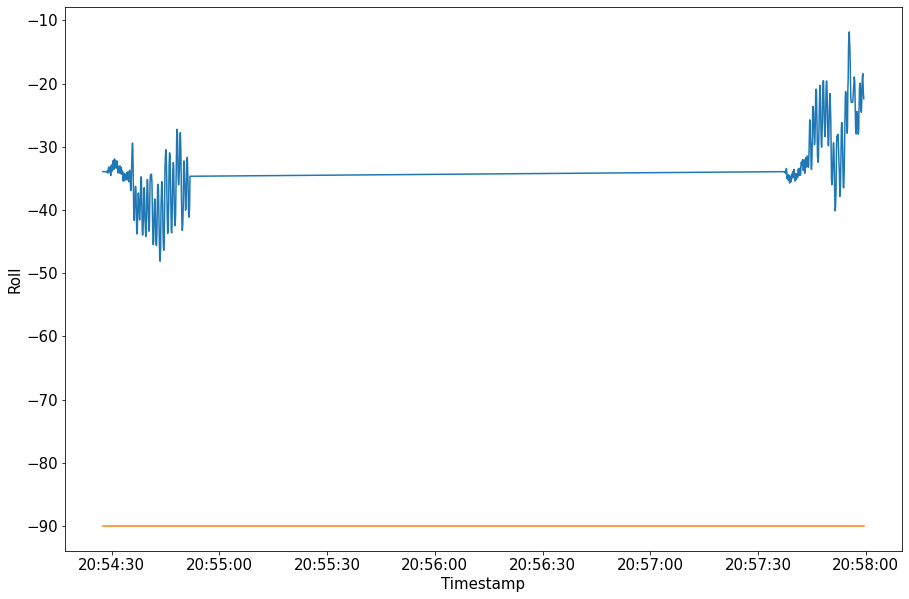

In [30]:
coeff_20_15K = get_optimal_coeff(data, 15500, 20000)
coeff_20_15K

,Roll P,Roll I,Roll D,Roll
57,-0.0105,-0.025,-0.0125,4.615143


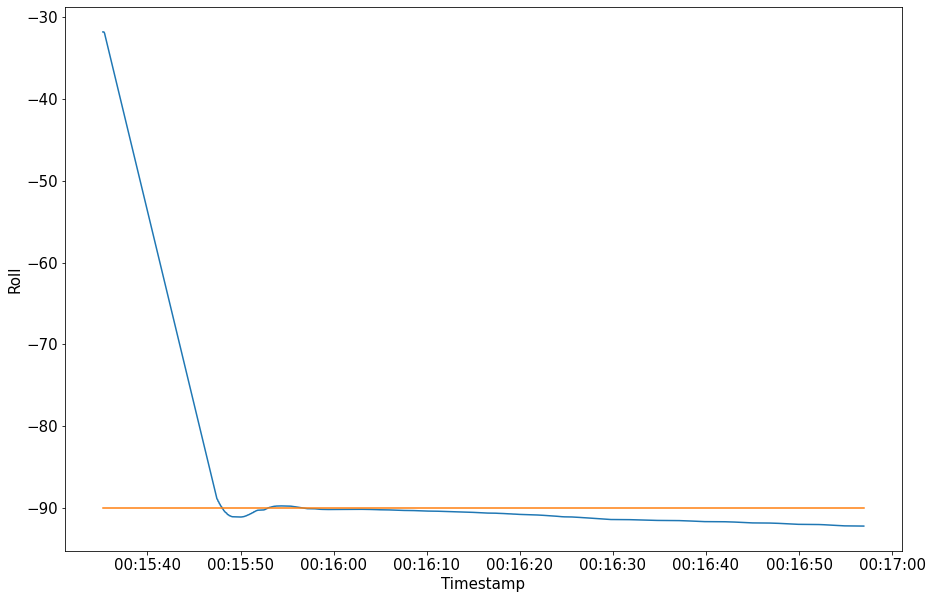

In [6]:
coeff_15_10K = get_optimal_coeff(data, 10000, 15000)
coeff_15_10K

,Roll P,Roll I,Roll D,Roll
20,-0.02,-0.01,-0.02,9.797049


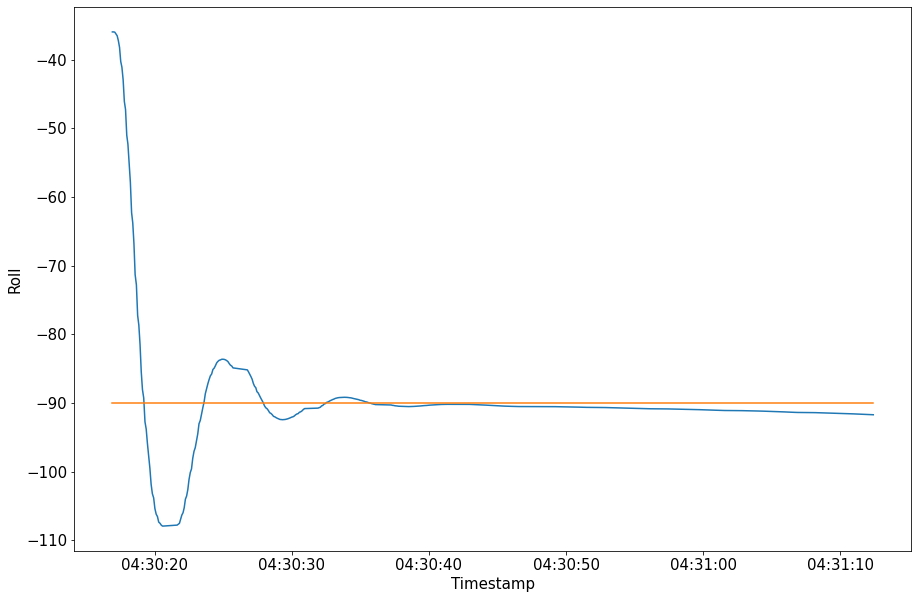

In [11]:
coeff_10_5K = get_optimal_coeff(data, 5000, 8000)
coeff_10_5K

,Roll P,Roll I,Roll D,Roll
35,-0.01525,-0.02,-0.02,0.229493


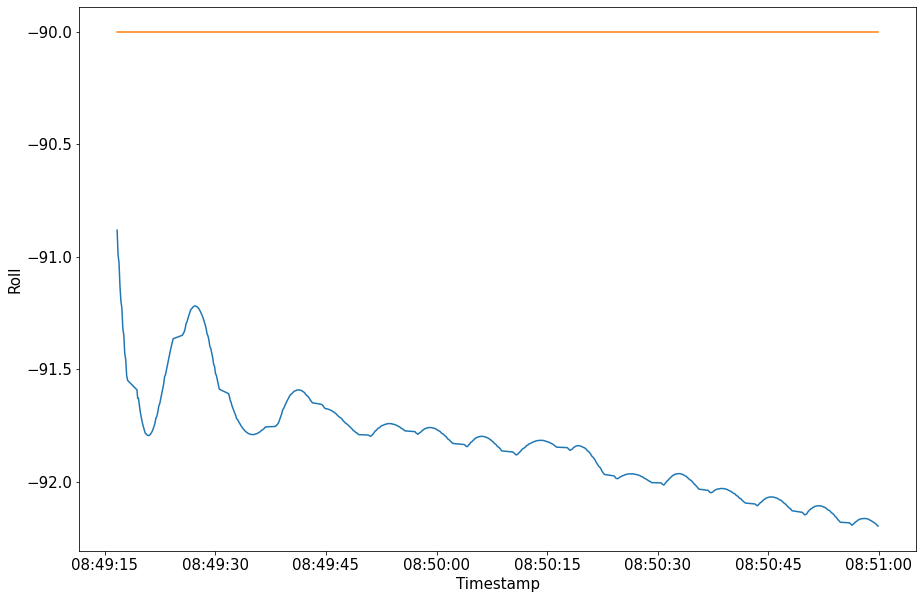

In [23]:
coeff_10_5K = get_optimal_coeff(data, 50, 3000)
coeff_10_5K

## 500m. 0 m/s

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data90['Timestamp'], data90['Roll'])
plt.plot(data90['Timestamp'], [-90] * data90.shape[0])
print(np.std(data90['Roll']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data90['Mass'], data90['Roll'])
plt.plot(data90['Mass'], [-90] * data90.shape[0])
print(np.std(data90['Roll']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data90lf['Timestamp'], data90lf['Roll'])
plt.plot(data90lf['Timestamp'], [-90] * data90lf.shape[0])
print(np.std(data90lf['Roll']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data90lfng['Timestamp'], data90lfng['Roll'])
plt.plot(data90lfng['Timestamp'], [-90] * data90lfng.shape[0])
print(np.std(data90lfng['Roll']))

## 20K alt. 200 m/s

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data['Timestamp'], data['Direction Y'])
plt.plot(data['Timestamp'], [0] * data.shape[0])
plt.title('Direction Y vs time. 200 m/s. 20K')
print(np.std(data['Direction Y']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data['Timestamp'], data['Direction X'])
plt.plot(data['Timestamp'], [0] * data.shape[0])
plt.title('Direction X vs time. 200 m/s. 20K')
print(np.std(data['Direction X']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data['Drag Y'], data['Direction Y'])
plt.plot(data['Drag Y'], [0] * data.shape[0])
plt.title('Direction Y vs Drag Y. 200 m/s. 20K')
print(np.std(data['Direction Y']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data['Drag X'], data['Direction X'])
plt.plot(data['Drag X'], [0] * data.shape[0])
plt.title('Direction X vs Drag X. 200 m/s. 20K')
print(np.std(data['Direction X']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data['Timestamp'], data['Roll'])
plt.plot(data['Timestamp'], [-90] * data.shape[0])
plt.title('Roll vs time. 200 m/s. 20K')
print(np.std(data['Roll']))

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data['Drag Z'], data['Roll'])
plt.plot(data['Drag Z'], [-90] * data.shape[0], c='y')
plt.title('Roll vs Drag Z. 200 m/s. 20K')
print(np.std(data['Roll']))